In [44]:
import pandas as pd
import numpy as np

In [45]:
df=pd.read_csv("BankNote_Authentication.csv")

In [46]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [47]:
df.shape

(1372, 5)

In [48]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [50]:
import matplotlib.pyplot as plt

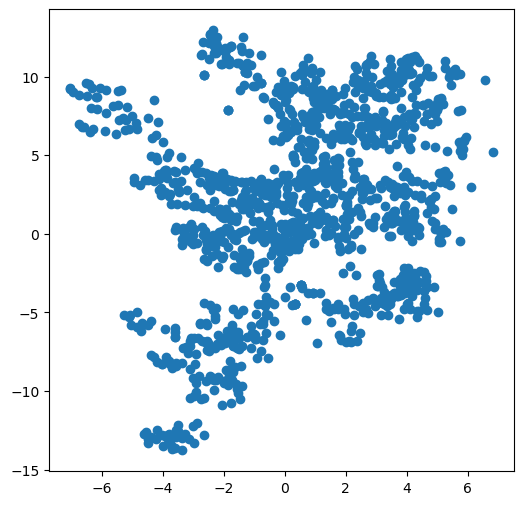

In [51]:
plt.figure(figsize=[6,6])
plt.scatter(df.variance,df.skewness)

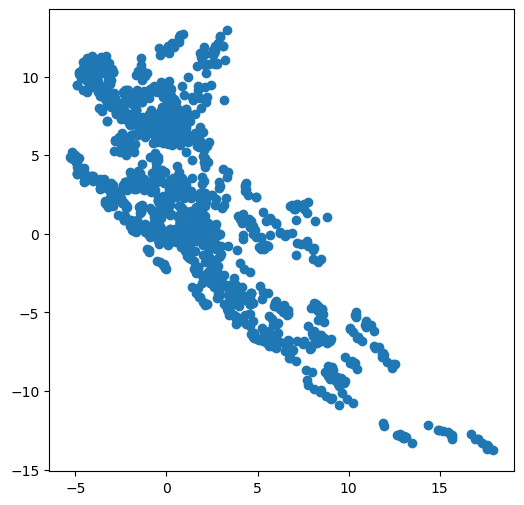

In [52]:
plt.figure(figsize=[6,6])
plt.scatter(df.curtosis,df.skewness)

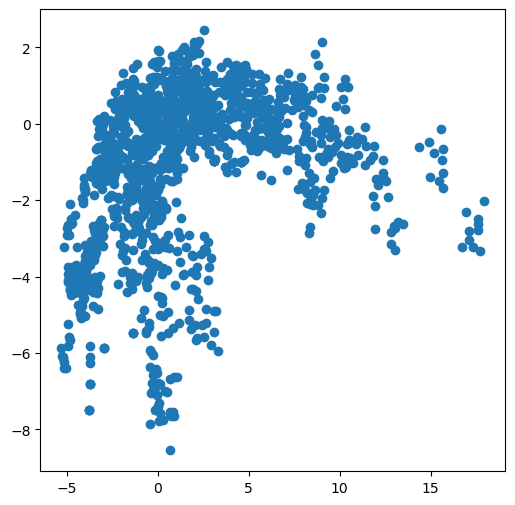

In [53]:
plt.figure(figsize=[6,6])
plt.scatter(df.curtosis,df.entropy)

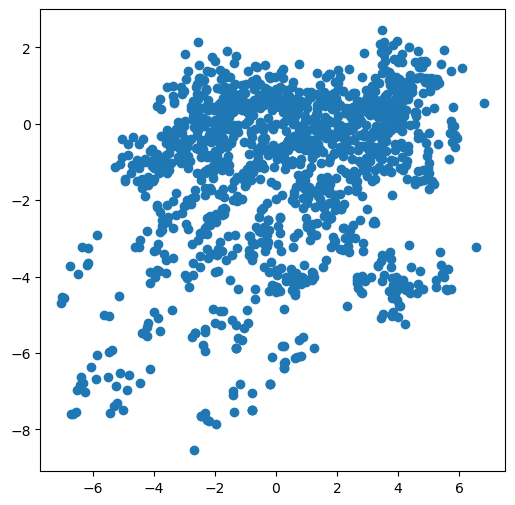

In [54]:
plt.figure(figsize=[6,6])
plt.scatter(df.variance,df.entropy)

In [55]:
data=np.column_stack((df.variance,df.skewness))
data

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

In [56]:
from sklearn.cluster import KMeans

In [57]:
km=KMeans(n_clusters=2)

In [58]:
km_res=km.fit(data)

In [59]:
df['KMeans']=km_res.labels_

In [60]:
centroid=km_res.cluster_centers_

In [61]:
import seaborn as sb

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


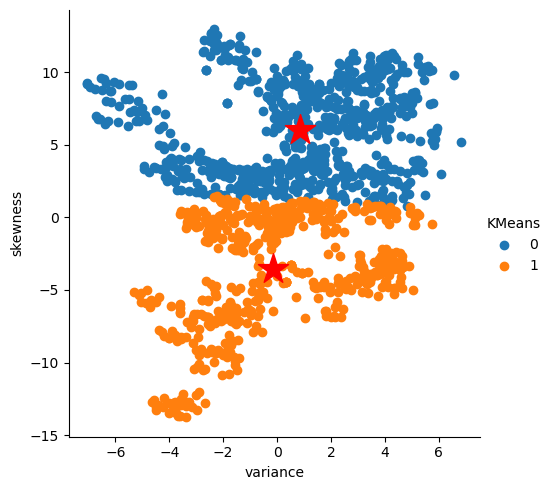

In [62]:
fig=sb.FacetGrid(data=df,hue="KMeans",size=5)
fig.map(plt.scatter,"variance","skewness")
fig.add_legend()
plt.scatter(centroid[:,0],centroid[:,1],s=520,marker="*",c="red")

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Data With KMeans')

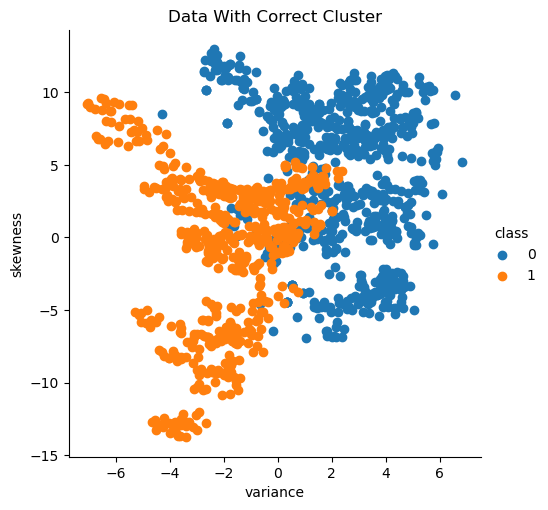

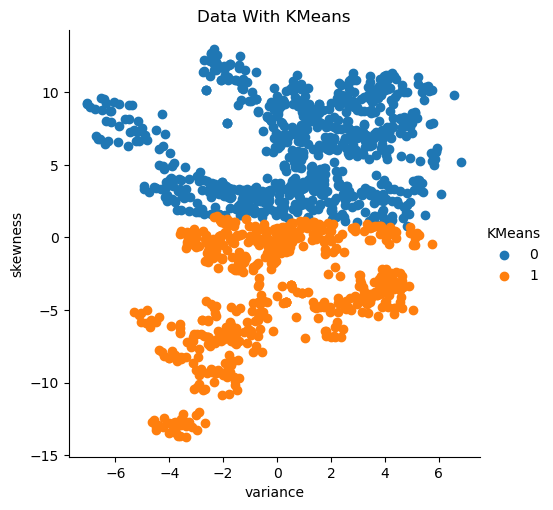

In [63]:
fig=sb.FacetGrid(data=df,hue="class",size=5)
fig.map(plt.scatter,"variance","skewness")
fig.add_legend()
plt.title("Data With Correct Cluster")

fig=sb.FacetGrid(data=df,hue="KMeans",size=5)
fig.map(plt.scatter,"variance","skewness")
fig.add_legend()
plt.title("Data With KMeans")


In [64]:
#df['KMeans']=df['KMeans'].map({0:1,1:2})

In [68]:
correct=0
for i in range(1372):
    if df['class'][i]==df.KMeans[i]:
        correct+=1

print(correct/1372)

0.6508746355685131
